# Observations on Drug Treatments on Mice

Observing the bar charts, it is clear that there are two treatments, Capomulin and Ramicane, that have better success rates than other treatments.  Judging by the higher quantity of measurements taken, we can infer that more mice survived to the final timepoint of the study.  One can infer that the survival of these mice is indicative of abatement of the progression of the tumors.  Further inference or conclusions would require more information about the nature of the cancer/tumor and details regarding the treatments.

Additionally, in investigating the Capomulin data, it is clear that there is a strong correlation between mouse weight and average tumor volume across the study.  This means that the heavier a mouse was (and their weight remained consistent through the study), the higher their average tumor volume.  We can infer that weight does indeed have a relationship with the tumor volume and that heavier mice are more likely to have a higher average tumor volume.


Another important element to note is that the ratio of male to female mice is almost 1:1.  This means, hopefully, that that ratio is also present within each of the treatments (in that, each drug treated largely an equal number of male and female mice). This means our analysis is necessarily generalized at this point, not reflective of the impact of gender on tumor volume or outcomes.  This may be helpful, if the outcomes by gender are similar, but without further analysis, we should not make that assumption or inference.  Further analysis to compare outcomes by gender may reveal if there is a relationship between gender and treatment success.


In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
# Open and read both data files
mouse_metadata_file = "Resources/Mouse_metadata.csv"
study_results_file = "Resources/Study_results.csv"

# Read and preview the data in a datafram
mouse_metadata_master = pd.read_csv(mouse_metadata_file)
mouse_metadata_master.head()

study_results_master = pd.read_csv(study_results_file)
study_results_master.head()

# Merge the dataframes
compiled_data_master = pd.merge(study_results_master, mouse_metadata_master, on="Mouse ID")
compiled_data_master.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Confirm each row is unique
# Many thanks to Stephanie Richards for her help!
duplicates = compiled_data_master[compiled_data_master.duplicated(["Mouse ID", "Timepoint"], keep=False)]
# duplicates

In [4]:
# Drop data for duplicated mouse g989
# df.loc[df['shield'] > 6]
cleaned_master = compiled_data_master.loc[compiled_data_master["Mouse ID"] != "g989"]
cleaned_master.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
# Summary Statistics Table
# mean, median, variance, STD, SEM of tumor volume for EACH drug regimen

drug_groups = cleaned_master.groupby("Drug Regimen")
mean_tumor_volume = drug_groups["Tumor Volume (mm3)"].mean()
# mean_tumor_volume
median_tumor_volume = drug_groups["Tumor Volume (mm3)"].median()
# median_tumor_volume
variance_tumor_volume = drug_groups["Tumor Volume (mm3)"].var()
# variance_tumor_volume
STD_tumor_volume = drug_groups["Tumor Volume (mm3)"].std()
# STD_tumor_volume
SEM_tumor_volume = drug_groups["Tumor Volume (mm3)"].sem()
# SEM_tumor_volume

In [6]:
# Start building summary table
Summary_Statistics_Table = pd.DataFrame({
    "Mean of Tumor Volume": mean_tumor_volume, 
    "Median of Tumor Volume": median_tumor_volume,
    "Variance of Tumor Volume": variance_tumor_volume,
    "Standard Deviation of Tumor Volume": STD_tumor_volume,
    "SEM of Tumor Volume": SEM_tumor_volume
})
Summary_Statistics_Table

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Make two identical bar charts with two different methods
# First with Matplotlib pyplot
# Second with DataFrame.plot()

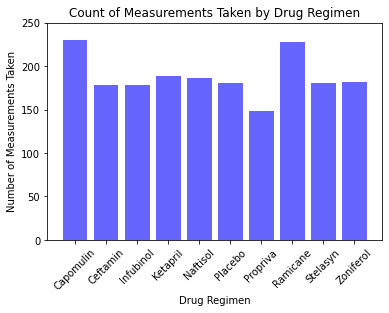

In [8]:
# Make a bar chart with matplotlib

# But first assemble the data to plot
cleaned_master.groupby("Drug Regimen").count()
count_of_measurements = drug_groups["Timepoint"].count()
# count_of_measurements

list_of_regimens = cleaned_master["Drug Regimen"].unique()
# list_of_regimens
alpha_regimens = sorted(list_of_regimens)
# alpha_regimens

# Plot the data

y_axis = count_of_measurements
x_axis = np.arange(len(alpha_regimens))

# Tell matplotlib to make a bar chart
plt.bar(x_axis, y_axis, color="blue", alpha=0.6, align="center")

# Formatting

plt.title("Count of Measurements Taken by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")
plt.ylim(0, 250)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, alpha_regimens, rotation="45")

plt.show()


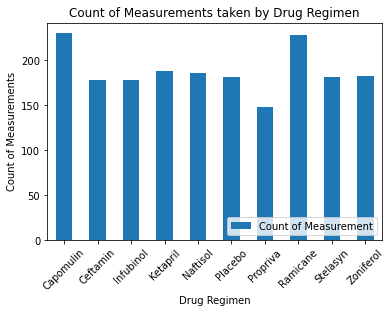

In [9]:
# Now to try with DataFrame.plot and a datframe

count_of_measurements_df = pd.DataFrame({
    "Drug Regimen": alpha_regimens,
    "Count of Measurement": count_of_measurements
})

# count_of_measurements_df

# Make the plot
x = "Drug Regimen"
y = "Count of Measurement"
title = "Count of Measurements taken by Drug Regimen"

measurement_by_regimen = count_of_measurements_df.plot.bar(x=x, y=y, rot=45, title=title)
plt.legend(loc="lower right")
plt.ylabel("Count of Measurements")
measurement_by_regimen

In [10]:
# Make two pie charts for gender distribution, same approach as bar charts

In [11]:
# Get count of male and female mice

cleaned_master.groupby("Sex").count()

# Make a dataframe of gender
gender_df = pd.DataFrame({
    "Sex": ["Female", "Male"],
    "Count": [len(cleaned_master.loc[cleaned_master["Sex"] == "Female"]), 
              len(cleaned_master.loc[cleaned_master["Sex"] == "Male"])]
})
gender_df

,Sex,Count
0,Female,922
1,Male,958


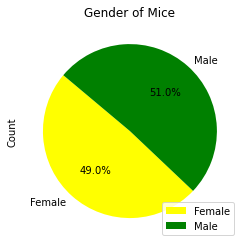

In [12]:
# Make a pie chart with df.plot

labels = ["Female", "Male"]
colors = ["yellow", "green"]
count_by_sex = gender_df.plot.pie(y="Count", autopct="%1.1f%%", colors=colors, 
                                  labels=labels, startangle=140)
plt.title(label="Gender of Mice")
plt.legend(loc="lower right")


count_by_sex

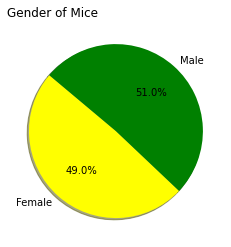

In [15]:
# Make a pie chart with matplotlib

pie_labels = ["Female", "Male"]
gender_counts = [len(cleaned_master.loc[cleaned_master["Sex"] == "Female"]), 
                 len(cleaned_master.loc[cleaned_master["Sex"] == "Male"])]
colors = ["yellow", "green"]
plt.pie(gender_counts, labels=pie_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title(label="Gender of Mice", loc="left")

plt.show()


In [16]:
# Trying something else care of Alyssa K and Stephanie Richards
# THIS WORKS HALLELUJAH
# There was something wrong with my data the first time I set up my dfs
# The extra df creation fixed the problem, but maintained the code that followed
# Next time I will be sure to resolve the data issue before building code that relies 
# on faulty dataframes

top_drugs_tumor_two = cleaned_master.loc[(cleaned_master["Drug Regimen"] == "Capomulin") | 
                                          (cleaned_master["Drug Regimen"] == "Ramicane") | 
                                          (cleaned_master["Drug Regimen"] == "Infubinol") | 
                                          (cleaned_master["Drug Regimen"] == "Ceftamin")]
top_drugs_df_max = top_drugs_tumor_two.groupby("Mouse ID").max()

# Merge on two columns

merged_top_drugs = pd.merge(top_drugs_df_max, cleaned_master, on=["Mouse ID", "Timepoint"])
merged_top_drugs.head(30)

# Drop columns that are not needed and rename those that are kept 

clean_top_drugs = merged_top_drugs[["Mouse ID", "Timepoint", "Tumor Volume (mm3)_y", 
                                    "Metastatic Sites_x", "Drug Regimen_x", "Sex_x", 
                                    "Age_months_x", "Weight (g)_x"]]

clean_top_drugs = clean_top_drugs.rename(columns={"Tumor Volume (mm3)_y": "Tumor Volume (mm3)",
                                                 "Metastatic Sites_x": "Metastatic Sites",
                                                 "Drug Regimen_x": "Drug Regimen",
                                                 "Sex_x": "Sex",
                                                 "Age_months_x": "Age Months",
                                                 "Weight (g)_x": "Weight (g)"})
clean_top_drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age Months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [17]:
# This for loop was made possibly by Kelly Devillier

drug_subsets = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

 # drug is each dataframe   
for drug in drug_subsets:
    
    sub_drug_df = clean_top_drugs.loc[clean_top_drugs["Drug Regimen"] == drug]
    quartiles = sub_drug_df["Tumor Volume (mm3)"].quantile([.25, .5, .75])
    lowerq = quartiles[.25] 
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lbound = lowerq - (1.5 * iqr)
    ubound = upperq + (1.5 * iqr)

    volumes = sub_drug_df["Tumor Volume (mm3)"]

    # Flag entries that are greater or less than ubound and lbound
    outliers = sub_drug_df.loc[sub_drug_df["Tumor Volume (mm3)"] < lbound]
    print(outliers)

Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age Months, Weight (g)]
Index: []
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age Months, Weight (g)]
Index: []
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
15     c326          5           36.321346                 0    Infubinol   

       Sex  Age Months  Weight (g)  
15  Female          18          25  
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age Months, Weight (g)]
Index: []


According to quantitative analysis of each drug, only Infubinol has an outlier outside 1.5IQR

In [18]:
# Isolate each drug's data
# My attempts to achieve this end with a for loop 
# did not result in something I found usable in the time I had

capomulin_data = clean_top_drugs.loc[clean_top_drugs["Drug Regimen"] == "Capomulin"]
ramicane_data = clean_top_drugs.loc[clean_top_drugs["Drug Regimen"] == "Ramicane"]
infubinol_data = clean_top_drugs.loc[clean_top_drugs["Drug Regimen"] == "Infubinol"]
ceftamin_data = clean_top_drugs.loc[clean_top_drugs["Drug Regimen"] == "Ceftamin"]

# Make a list of volumes for each drug

cap_volumes = capomulin_data["Tumor Volume (mm3)"]
ram_volumes = ramicane_data["Tumor Volume (mm3)"]
cef_volumes = ceftamin_data["Tumor Volume (mm3)"]
inf_volumes = infubinol_data["Tumor Volume (mm3)"]


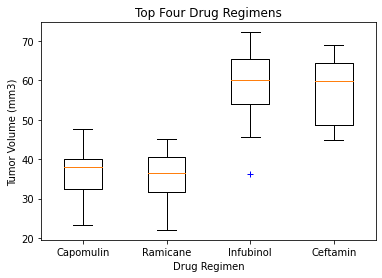

In [19]:
# Plot all four drugs on a box and whisker plot

# Make a list in order I want to have plots appear
drug_labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Make a list holding all the data in order of the drugs
tumor_volume_data = [cap_volumes, ram_volumes, inf_volumes, cef_volumes]

fig, ax = plt.subplots()
ax.boxplot(tumor_volume_data, sym="b+")
ax.set_xticklabels(drug_labels)
ax.set_title("Top Four Drug Regimens")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlabel("Drug Regimen")


plt.show()


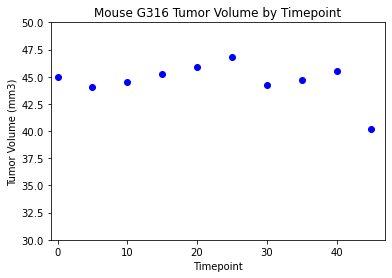

In [20]:
# Pick a capomulin treaeted mouse
cap_mouse_data = cleaned_master.loc[cleaned_master["Drug Regimen"] == "Capomulin"]
# list(cap_mouse_data["Mouse ID"]) # I choose g316
 
# Isolate g316 data
g316_data = cleaned_master.loc[cleaned_master["Mouse ID"] == "g316"]
# g316_data

# Set variables for timepoint vs tumor volume line plot
timepoint = g316_data["Timepoint"]
tumor_volume = g316_data["Tumor Volume (mm3)"]

plt.plot(timepoint, tumor_volume, "bo")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse G316 Tumor Volume by Timepoint")
plt.xlim(-1, 47)
plt.ylim(30, 50)
plt.show()

The correlation between weight and tumor volume is 0.84


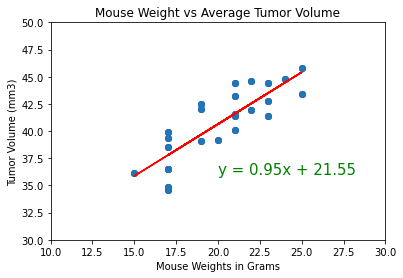

In [21]:
# Plot ALL mice weights against tumor volume (list of unique weights)
# Need a list of unique mice weights for capomulin treatment and list of tumor volumes
# capomulin_data
cap_weights = capomulin_data["Weight (g)"]
avg_cap_data = cap_mouse_data.groupby("Mouse ID").mean()
avg_cap_tumor = avg_cap_data["Tumor Volume (mm3)"]
# avg_cap_tumor

plt.scatter(cap_weights, avg_cap_tumor, color="blue")
plt.xlabel("Mouse Weights in Grams")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlim(10, 30)
plt.ylim(30, 50)

correlation = st.pearsonr(cap_weights, avg_cap_tumor)
print(f"The correlation between weight and tumor volume is {round(correlation[0],2)}")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_weights, avg_cap_tumor)
regress_values = cap_weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cap_weights, avg_cap_tumor)
plt.plot(cap_weights, regress_values, "r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="green")


plt.show()

